In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

from fairpair import *

## Contained in Ranking (Giant Strongly Connected Component)

In [2]:
import multiprocessing
from workers import get_representation, get_accuracy

In [19]:
if __name__ == '__main__':
    pool = multiprocessing.Pool()
    contained = pool.map(get_representation, range(0,10))
    contained = [result for pool in contained for result in pool]
    contained = pd.DataFrame(contained, columns=['trial', 'iteration', 'share giant component', 'group'])
    contained

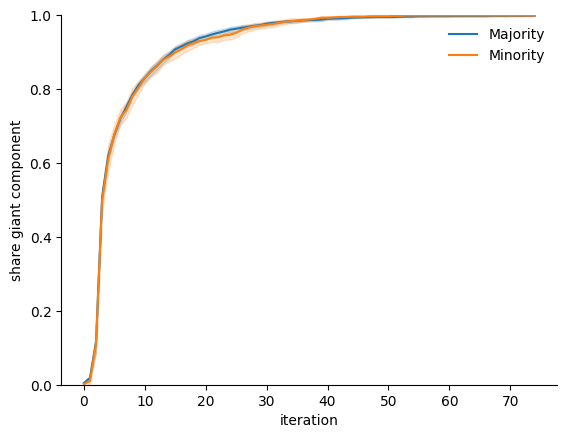

In [20]:
ax = sns.lineplot(contained, x='iteration', y='share giant component', hue='group', hue_order=['Majority', 'Minority'])
ax.legend(title=None, frameon=False)
ax.set(ylim=(0, 1))
sns.despine()

## Accuracy

In [36]:
if __name__ == '__main__':
    pool = multiprocessing.Pool()
    contained = pool.map(get_accuracy, range(0,10))
    contained = [result for pool in contained for result in pool]
    contained = pd.DataFrame(contained, columns=['trial', 'iteration', 'mean squared error', 'group'])
    contained

Strongly connected after 14 iterations.
Strongly connected after 15 iterations.
Strongly connected after 14 iterations.
Strongly connected after 16 iterations.
Strongly connected after 18 iterations.
Strongly connected after 19 iterations.
Strongly connected after 19 iterations.
Strongly connected after 19 iterations.
Strongly connected after 22 iterations.
Strongly connected after 24 iterations.


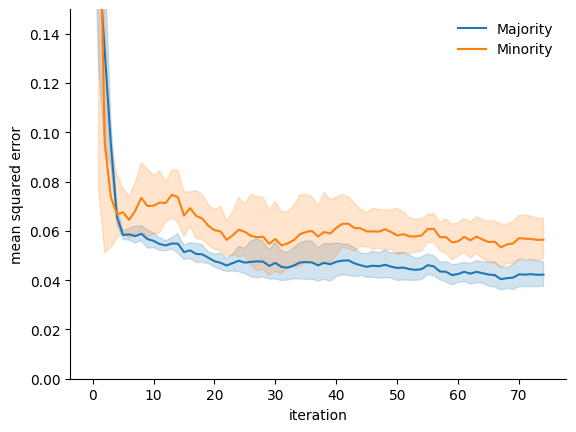

In [37]:
ax = sns.lineplot(contained, x='iteration', y='mean squared error', hue='group', hue_order=['Majority', 'Minority'])
ax.legend(title=None, frameon=False)
ax.set(ylim=(0, 0.15)) #ax.set(ylim=(0, 40000))
sns.despine()